In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# https://archive.ics.uci.edu/ml/datasets/Power+consumption+of+Tetouan+city#

In [2]:
#data = pd.read_csv("Tetuan_City_power_consumption.csv")
data = pd.read_csv("Tetuan_City_power_consumption.csv" ) # ,index_col='DateTime')  # Should I switche the index to Datetime?
data.columns = data.columns.str.replace(' ','_')
#data['DateTime'] = pd.to_datetime(data['DateTime'])
data

,DateTime,Temperature,Humidity,Wind_Speed,general_diffuse_flows,diffuse_flows,Zone_1_Power_Consumption,Zone_2__Power_Consumption,Zone_3__Power_Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind_Speed                 52416 non-null  float64
 4   general_diffuse_flows      52416 non-null  float64
 5   diffuse_flows              52416 non-null  float64
 6   Zone_1_Power_Consumption   52416 non-null  float64
 7   Zone_2__Power_Consumption  52416 non-null  float64
 8   Zone_3__Power_Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [4]:
data.DateTime = pd.to_datetime(data.DateTime)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DateTime                   52416 non-null  datetime64[ns]
 1   Temperature                52416 non-null  float64       
 2   Humidity                   52416 non-null  float64       
 3   Wind_Speed                 52416 non-null  float64       
 4   general_diffuse_flows      52416 non-null  float64       
 5   diffuse_flows              52416 non-null  float64       
 6   Zone_1_Power_Consumption   52416 non-null  float64       
 7   Zone_2__Power_Consumption  52416 non-null  float64       
 8   Zone_3__Power_Consumption  52416 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.6 MB


In [6]:
data.set_index('DateTime', inplace=True)

# Zone 1

In [131]:
data_zone1 = data[['Zone_1_Power_Consumption']]

In [132]:
# Changing frequency to daily
data_zone1 = data_zone1.resample('D').sum()

In [133]:
data_zone1

,Zone_1_Power_Consumption
DateTime,
2017-01-01,4.098993e+06
2017-01-02,4.157207e+06
2017-01-03,4.400992e+06
2017-01-04,4.419336e+06
2017-01-05,4.435619e+06
...,...
2017-12-26,4.321941e+06
2017-12-27,4.315243e+06
2017-12-28,4.358449e+06


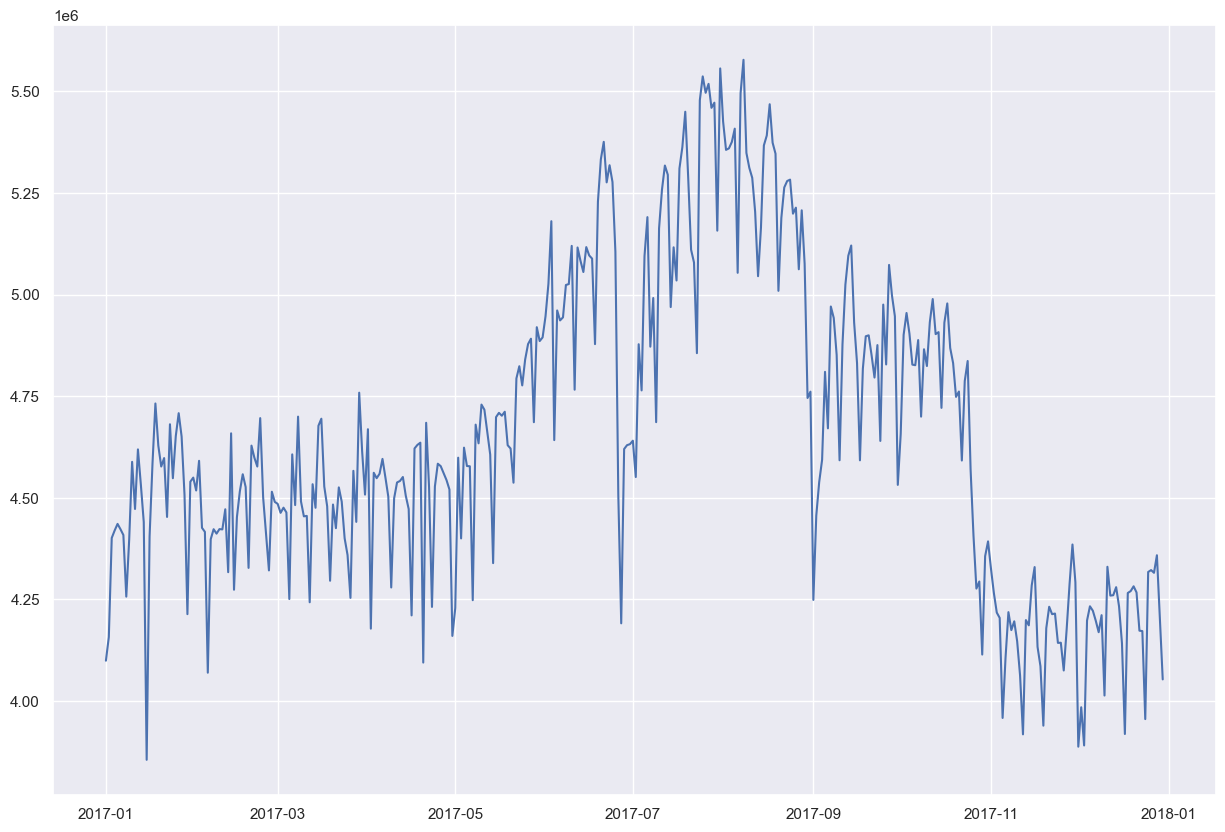

In [135]:
fig =plt.figure(figsize=(15,10))
plt.plot(data_zone1)

### Checking for seanality

In [31]:
# %pip install statsmodels

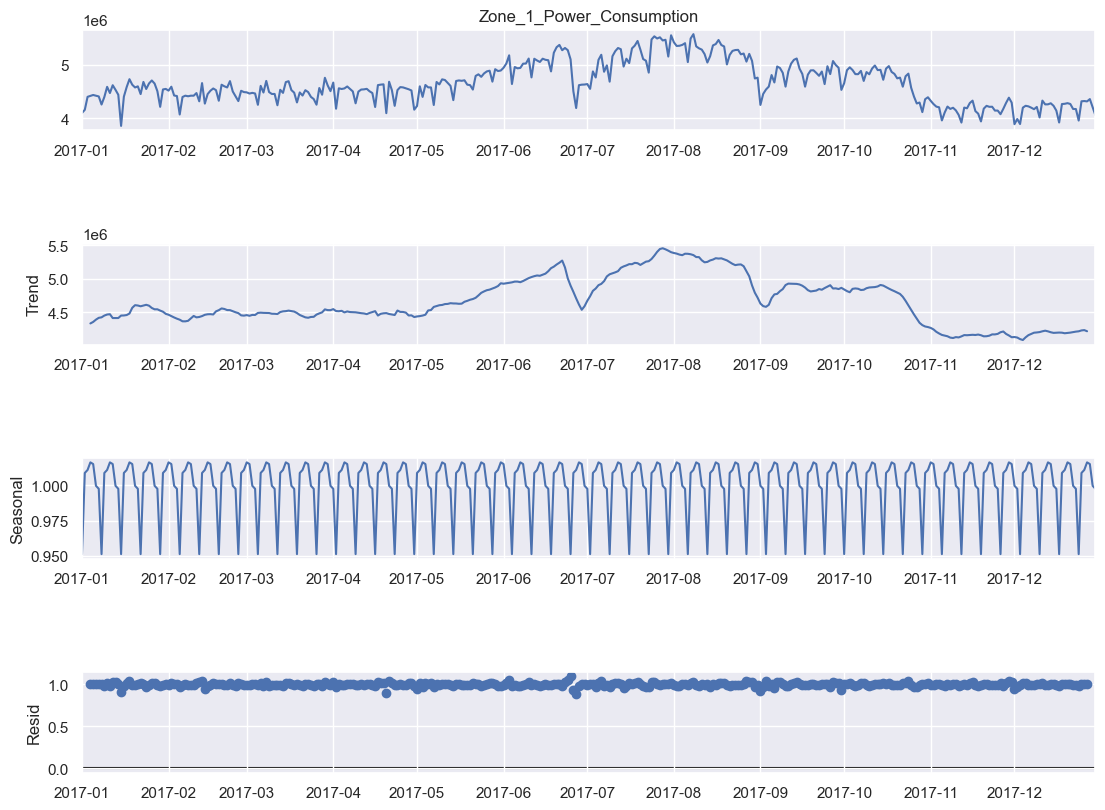

In [165]:
from statsmodels.tsa.seasonal import seasonal_decompose

### Question about perioud and freq
#data_zone1.index.freq = 'YS'

# Specify multiplicative model  
fig = seasonal_decompose(data_zone1['Zone_1_Power_Consumption'],model='mul').plot();
fig.set_size_inches((12, 9))
plt.show()

![](assets/pd_offset_codes.png)

In [141]:
type(data_zone1)

pandas.core.frame.DataFrame

In [142]:
data_zone1

,Zone_1_Power_Consumption
DateTime,
2017-01-01,4.098993e+06
2017-01-02,4.157207e+06
2017-01-03,4.400992e+06
2017-01-04,4.419336e+06
2017-01-05,4.435619e+06
...,...
2017-12-26,4.321941e+06
2017-12-27,4.315243e+06
2017-12-28,4.358449e+06


In [143]:
# %pip install pmdarima

In [36]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from pmdarima import auto_arima 

def time_series_analysis( data, column, test_size, seasonal_status=False, seasonal_period=1 ):
    df_ = data[[column]]
    
    #Spliting data to train and test
    train_test_cutoff = int(len(df_)*(1-test_size))
    train = df_.iloc[:train_test_cutoff] # Drop the last 27 years of our data
    test = df_.iloc[train_test_cutoff:]
    
    # Finding best parameter
     
    best_fit = auto_arima(df_[[column]],trace=True ,
                          seasonal=seasonal_status, m=seasonal_period, error_action='ignore')
    
    # Fitting our ARIMA or SARIMA model 
    from statsmodels.tsa.arima.model import ARIMA
    
    
    if seasonal_status:  # It is deciding whether use Sarima or arima model based on "seasonal_status" input
        model = SARIMAX(train[column].astype(float), 
                        order=best_fit.order, 
                        seasonal_order=best_fit.seasonal_order).fit()
    else:
        model = ARIMA(train[column].astype(float), order=best_fit.order).fit() # best_fit.order is getting the order of the best fitted model from line above
    # Casting the training data as float is not a required step
    # This is to prevent us from getting a dtype error when predicting 

    # Predicting 

    # We want to start our predictions at the end of our training data 
    start = len(train)

    # We want to predict our entire DF - 1 because the end is inclusive. 
    # Our df has 264 rows, but rows start at 0 and end at row 263 
    end = len(train) + len(test) - 1

    predictions = model.predict(start=start, end=end, typ='levels').rename(f'best_fit{best_fit.order}')
    
    
    # Plotting our predictions 

    test[column].plot(figsize=(12,8), legend=True)
    predictions.plot(legend=True);
    plt.show()
    
    # Model Evaluation 
    from statsmodels.tools.eval_measures import rmse

    print(f'rmse: {rmse(test[column],predictions)}')
    # We can also compare the mean values for our predictions and mean values for the test set to see how we 
    # are doing

    print(f'Test Mean: {test[column].mean()}')
    print(f'Prediction Mean: {predictions.mean()}')
    
    if seasonal_status:  # It is deciding whether use Sarimax or arima model based on "seasonal_status" input

        full_data_model =SARIMAX(df_[column].astype(float), 
                                                    order=best_fit.order, 
                                                    seasonal_order=best_fit.seasonal_order).fit()
    else:
            
        full_data_model = ARIMA(df_[column].astype(float), order=best_fit.order,).fit()

    #model.summary()

    forecast = full_data_model.predict(start=len(df_), end=len(df_)+11, typ='levels').rename('ARIMA Forecast')

    df_[column].plot(legend=True,figsize=(12,6))
    forecast.plot(legend=True);
    

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.55 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=9847.095, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=9801.715, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=9805.087, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=9845.097, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=9834.333, Time=0.08 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=9801.115, Time=0.21 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,0)(2,0,0)[7] intercept   : AIC=9813.081, Time=0.17 sec
 ARIMA(2,1,0)(2,0,0)[7] intercept   : AIC=9802.729, Time=0.30 sec
 ARIMA(1,1,1)(2,0,0)[7] intercept   : AIC=9802.463, Time=0.44 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=9801.436, Time=0.25 sec
 ARIMA(2,1,1)(2,0,0)[7] intercept   : AIC=9804.409, Time=0.70 sec
 ARIMA(1,1,0)(2,0,0)[7]             : AIC=9799.1

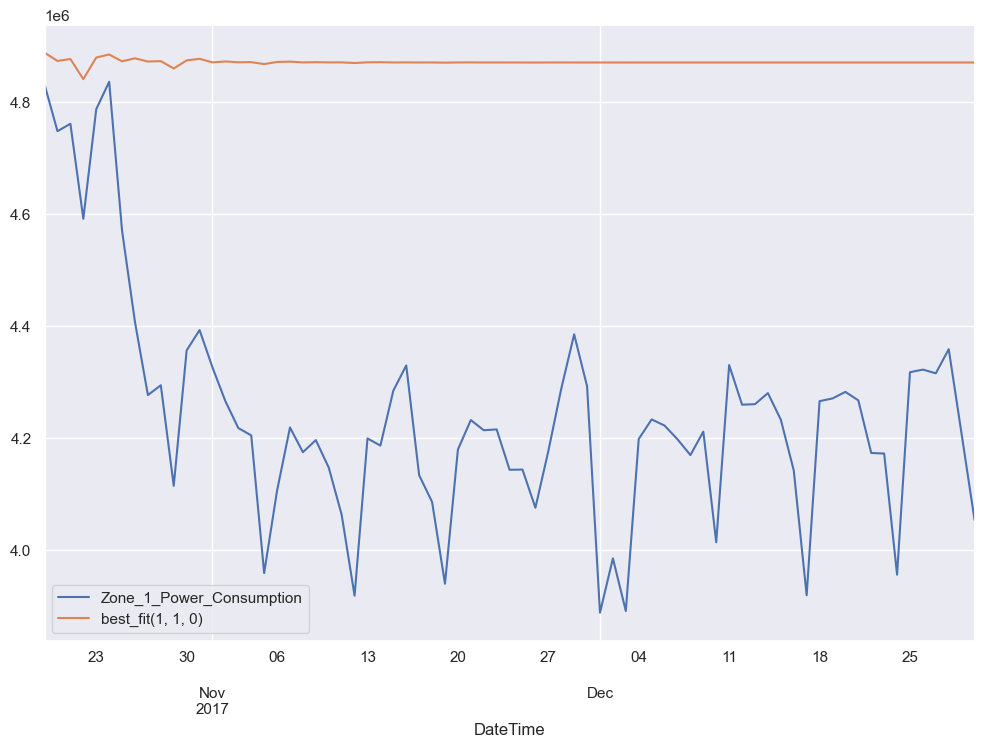

rmse: 661042.2181258926
Test Mean: 4241641.372814246
Prediction Mean: 4871426.695895803


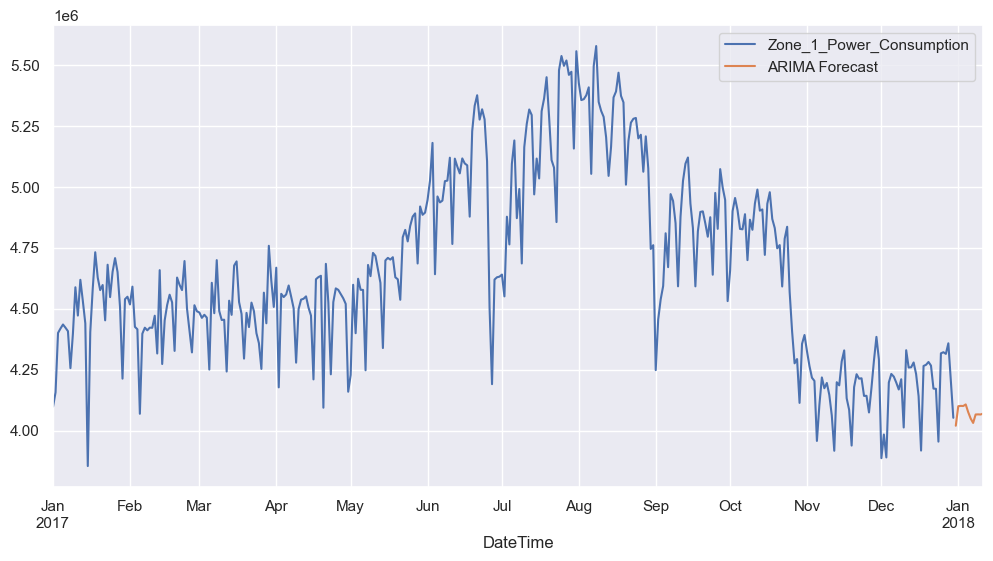

In [38]:
time_series_analysis( data_zone1, column='Zone_1_Power_Consumption', test_size=0.2, seasonal_status=True, seasonal_period=7 )

# Step by Step approach

In [155]:
df_ = data_zone1[['Zone_1_Power_Consumption']]
test_size = 0.15
column = 'Zone_1_Power_Consumption'
seasonal_status =True
seasonal_period = 28

In [156]:
#Spliting data to train and test
train_test_cutoff = int(len(df_)*(1-test_size))
train = df_.iloc[:train_test_cutoff] # Drop the last 27 years of our data
test = df_.iloc[train_test_cutoff:]

In [157]:
test.head(10)

,Zone_1_Power_Consumption
DateTime,
2017-11-06,4.105625e+06
2017-11-07,4.218443e+06
2017-11-08,4.174265e+06
2017-11-09,4.195889e+06
2017-11-10,4.146782e+06
2017-11-11,4.062511e+06
2017-11-12,3.917760e+06
2017-11-13,4.198898e+06
2017-11-14,4.186012e+06


In [158]:


# Finding best parameter

best_fit = auto_arima(df_[[column]],trace=True ,
                      seasonal=seasonal_status, m=seasonal_period, error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[28] intercept   : AIC=inf, Time=5.54 sec
 ARIMA(0,1,0)(0,0,0)[28] intercept   : AIC=9847.095, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[28] intercept   : AIC=9819.923, Time=0.71 sec
 ARIMA(0,1,1)(0,0,1)[28] intercept   : AIC=9824.251, Time=0.84 sec
 ARIMA(0,1,0)(0,0,0)[28]             : AIC=9845.097, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[28] intercept   : AIC=9834.333, Time=0.13 sec
 ARIMA(1,1,0)(2,0,0)[28] intercept   : AIC=9804.287, Time=1.88 sec
 ARIMA(1,1,0)(2,0,1)[28] intercept   : AIC=inf, Time=4.95 sec
 ARIMA(1,1,0)(1,0,1)[28] intercept   : AIC=inf, Time=1.37 sec
 ARIMA(0,1,0)(2,0,0)[28] intercept   : AIC=9817.455, Time=2.19 sec
 ARIMA(2,1,0)(2,0,0)[28] intercept   : AIC=9806.000, Time=4.45 sec
 ARIMA(1,1,1)(2,0,0)[28] intercept   : AIC=9805.818, Time=6.26 sec
 ARIMA(0,1,1)(2,0,0)[28] intercept   : AIC=9804.642, Time=2.08 sec
 ARIMA(2,1,1)(2,0,0)[28] intercept   : AIC=9807.809, Time=6.19 sec
 ARIMA(1,1,0)(2,0,0)[28]          

In [159]:
if seasonal_status:  # It is deciding whether use Sarima or arima model based on "seasonal_status" input
        model = SARIMAX(train[column].astype(float), 
                        order=best_fit.order, 
                        seasonal_order=best_fit.seasonal_order).fit()
else:
        model = ARIMA(train[column].astype(float), order=best_fit.order).fit()
# model = SARIMAX(train[column].astype(float), 
#                         order=best_fit.order, 
#                         seasonal_order=best_fit.seasonal_order).fit()

In [160]:
# Predicting 

# We want to start our predictions at the end of our training data 
start = len(train)

# We want to predict our entire DF - 1 because the end is inclusive. 
# Our df has 264 rows, but rows start at 0 and end at row 263 
end = len(train) + len(test) - 1

predictions = model.predict(start=start, end=end, typ='levels').rename(f'best_fit{best_fit.order}')

In [161]:
predictions

2017-11-06    4.033575e+06
2017-11-07    4.046798e+06
2017-11-08    4.065569e+06
2017-11-09    4.073611e+06
2017-11-10    4.041316e+06
2017-11-11    4.028429e+06
2017-11-12    3.981145e+06
2017-11-13    4.028567e+06
2017-11-14    4.043074e+06
2017-11-15    4.034248e+06
2017-11-16    4.024629e+06
2017-11-17    4.010433e+06
2017-11-18    4.022137e+06
2017-11-19    3.976687e+06
2017-11-20    4.037530e+06
2017-11-21    4.022071e+06
2017-11-22    4.032400e+06
2017-11-23    4.008798e+06
2017-11-24    3.991162e+06
2017-11-25    3.937530e+06
2017-11-26    3.939190e+06
2017-11-27    3.991722e+06
2017-11-28    4.001898e+06
2017-11-29    3.989610e+06
2017-11-30    3.974446e+06
2017-12-01    3.970243e+06
2017-12-02    3.977369e+06
2017-12-03    3.931849e+06
2017-12-04    3.960141e+06
2017-12-05    3.955769e+06
2017-12-06    3.971645e+06
2017-12-07    3.979881e+06
2017-12-08    3.965735e+06
2017-12-09    3.965307e+06
2017-12-10    3.936629e+06
2017-12-11    3.968424e+06
2017-12-12    3.975903e+06
2

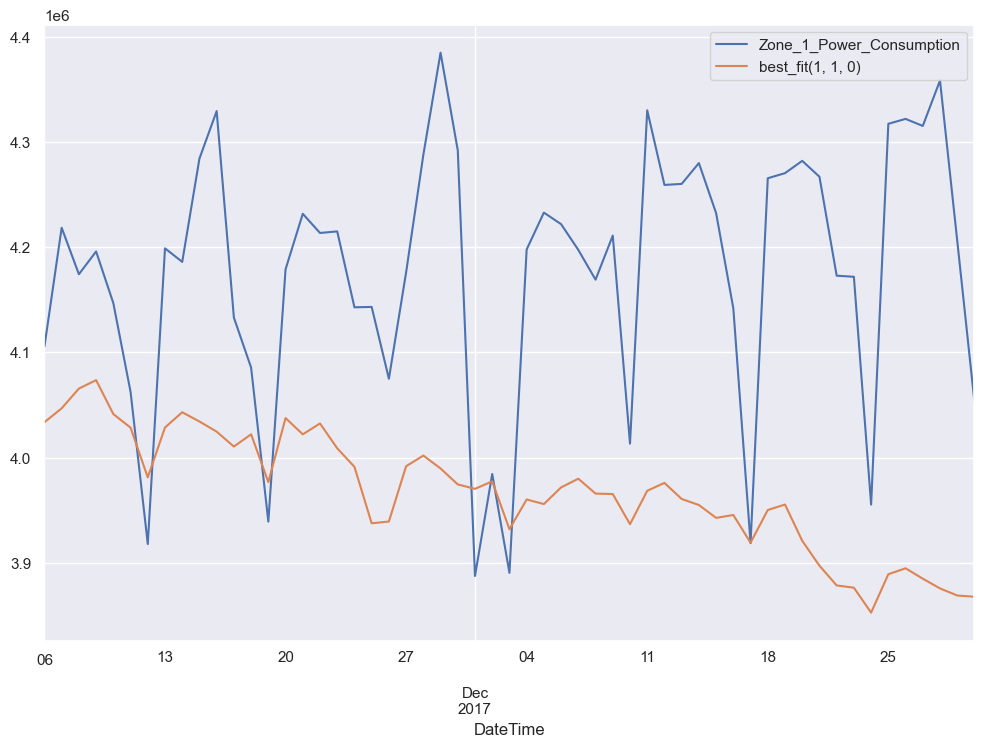

In [162]:
# Plotting our predictions 

test[column].plot(figsize=(12,8), legend=True)
predictions.plot(legend=True);
plt.show()

In [163]:
# Model Evaluation 
from statsmodels.tools.eval_measures import rmse

print(f'rmse: {rmse(test[column],predictions)}')
# We can also compare the mean values for our predictions and mean values for the test set to see how we 
# are doing

print(f'Test Mean: {test[column].mean()}')
print(f'Prediction Mean: {predictions.mean()}')

if seasonal_status:  # It is deciding whether use Sarimax or arima model based on "seasonal_status" input

    full_data_model =SARIMAX(df_[column].astype(float), 
                                                order=best_fit.order, 
                                                seasonal_order=best_fit.seasonal_order).fit()
else:

    full_data_model = ARIMA(df_[column].astype(float), order=best_fit.order,).fit()



rmse: 247527.70810297708
Test Mean: 4176410.2081952724
Prediction Mean: 3967812.1596476827


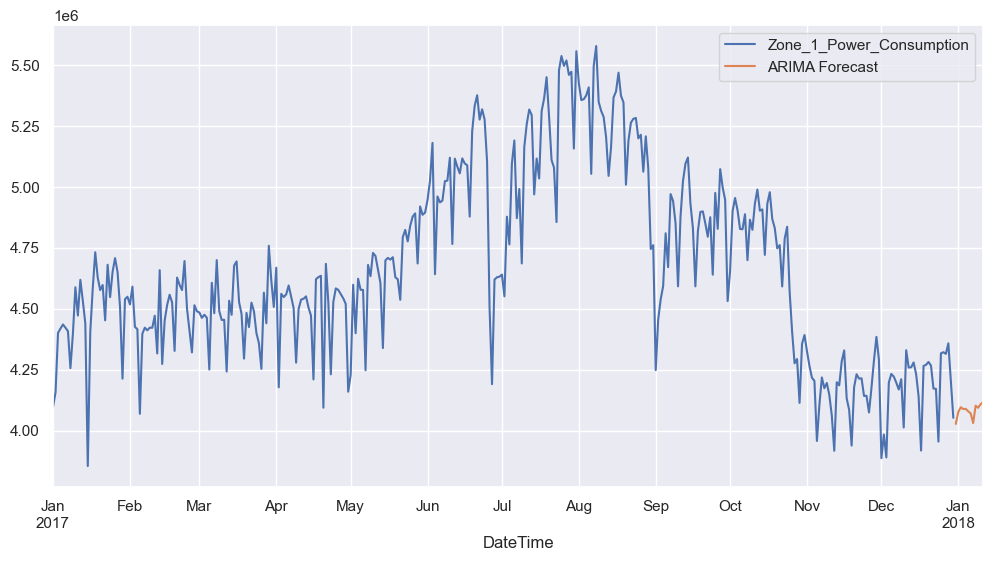

In [164]:
forecast = full_data_model.predict(start=len(df_), end=len(df_)+11, typ='levels').rename('ARIMA Forecast')

df_[column].plot(legend=True,figsize=(12,6))
forecast.plot(legend=True);